# Breast Cancer detection 

In [ ]:
from sklearn.datasets import load_breast_cancer

#importing the dataset
dataset = load_breast_cancer()

## Part 1: Getting started

In [ ]:
#printing the dataset
dataset

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [ ]:
import pandas as pd
#converting dataset to dataframe (table)
df = pd.DataFrame(data = dataset.data,columns = dataset.feature_names)
#adding new column target and mapping it with value from the dataset
df["target"] = dataset.target
#mapping the target value with the target names using map function
df["target"] = df["target"].map({0:dataset.target_names[0],1:dataset.target_names[1]})
#printing the dataframe df
df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [ ]:
total_number_of_features = dataset.feature_names.size
total_number_of_features

30

In [ ]:
df[df["mean area"]>700].count()

mean radius                171
mean texture               171
mean perimeter             171
mean area                  171
mean smoothness            171
mean compactness           171
mean concavity             171
mean concave points        171
mean symmetry              171
mean fractal dimension     171
radius error               171
texture error              171
perimeter error            171
area error                 171
smoothness error           171
compactness error          171
concavity error            171
concave points error       171
symmetry error             171
fractal dimension error    171
worst radius               171
worst texture              171
worst perimeter            171
worst area                 171
worst smoothness           171
worst compactness          171
worst concavity            171
worst concave points       171
worst symmetry             171
worst fractal dimension    171
target                     171
dtype: int64

In [ ]:
df[df["target"].str.contains("malignant")].count()

mean radius                212
mean texture               212
mean perimeter             212
mean area                  212
mean smoothness            212
mean compactness           212
mean concavity             212
mean concave points        212
mean symmetry              212
mean fractal dimension     212
radius error               212
texture error              212
perimeter error            212
area error                 212
smoothness error           212
compactness error          212
concavity error            212
concave points error       212
symmetry error             212
fractal dimension error    212
worst radius               212
worst texture              212
worst perimeter            212
worst area                 212
worst smoothness           212
worst compactness          212
worst concavity            212
worst concave points       212
worst symmetry             212
worst fractal dimension    212
target                     212
dtype: int64

In [ ]:
df[df["target"].str.contains("benign")].count()

mean radius                357
mean texture               357
mean perimeter             357
mean area                  357
mean smoothness            357
mean compactness           357
mean concavity             357
mean concave points        357
mean symmetry              357
mean fractal dimension     357
radius error               357
texture error              357
perimeter error            357
area error                 357
smoothness error           357
compactness error          357
concavity error            357
concave points error       357
symmetry error             357
fractal dimension error    357
worst radius               357
worst texture              357
worst perimeter            357
worst area                 357
worst smoothness           357
worst compactness          357
worst concavity            357
worst concave points       357
worst symmetry             357
worst fractal dimension    357
target                     357
dtype: int64

In [ ]:
# converting the target to binary value and adding it to dataframe
df["target"] = df["target"].map({dataset.target_names[0]:0,dataset.target_names[1]:1})

In [ ]:
# printing the dataframe with target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Splitting the data

In [ ]:
#Splitting into train and test set
from sklearn.model_selection import train_test_split
x, y = dataset.data, dataset.target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)
# train["target"] = train["target"].map({dataset.target_names[0]:0,dataset.target_names[1]:1})
print(x_train)
print(y_train)

[[1.149e+01 1.459e+01 7.399e+01 ... 7.431e-02 2.941e-01 9.180e-02]
 [1.049e+01 1.861e+01 6.686e+01 ... 6.528e-02 2.213e-01 7.842e-02]
 [1.225e+01 1.794e+01 7.827e+01 ... 8.211e-02 3.113e-01 8.132e-02]
 ...
 [9.436e+00 1.832e+01 5.982e+01 ... 5.052e-02 2.454e-01 8.136e-02]
 [9.720e+00 1.822e+01 6.073e+01 ... 0.000e+00 1.909e-01 6.559e-02]
 [1.151e+01 2.393e+01 7.452e+01 ... 9.653e-02 2.112e-01 8.732e-02]]
[1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1
 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1
 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0
 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1
 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 

### Effect of Standardization (Visual)

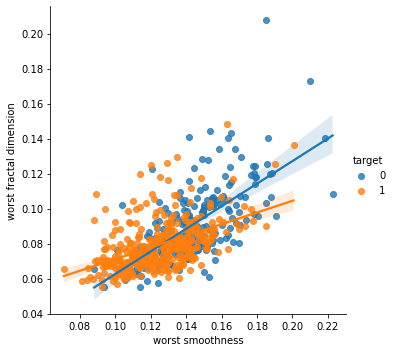

In [ ]:
import seaborn
seaborn.lmplot(x="worst smoothness",y = "worst fractal dimension",data=df,hue="target")

In [ ]:
df['worst smoothness'].mean(),df['worst fractal dimension'].mean()

(0.13236859402460469, 0.08394581722319855)

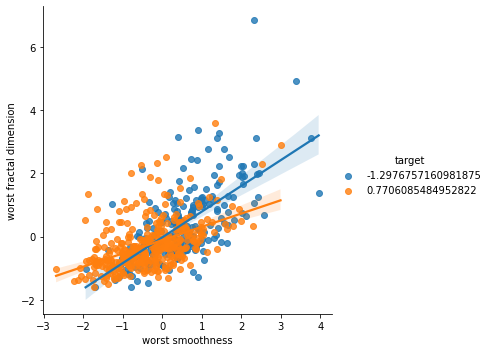

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scale= StandardScaler()

scale.fit(df)
train_norm = scale.transform(df)
train_norm
col = np.append(dataset.feature_names,values="target")
df_train_normalized = pd.DataFrame(train_norm, columns=col)
df_train_normalized

seaborn.lmplot(x="worst smoothness",y = "worst fractal dimension",data=df_train_normalized,hue="target")


In [ ]:
df_train_normalized['worst smoothness'].mean(),df_train_normalized['worst fractal dimension'].mean(),df_train_normalized.std()

(-2.2516649743715826e-16,
 -6.436952123441813e-16,
 mean radius                1.00088
 mean texture               1.00088
 mean perimeter             1.00088
 mean area                  1.00088
 mean smoothness            1.00088
 mean compactness           1.00088
 mean concavity             1.00088
 mean concave points        1.00088
 mean symmetry              1.00088
 mean fractal dimension     1.00088
 radius error               1.00088
 texture error              1.00088
 perimeter error            1.00088
 area error                 1.00088
 smoothness error           1.00088
 compactness error          1.00088
 concavity error            1.00088
 concave points error       1.00088
 symmetry error             1.00088
 fractal dimension error    1.00088
 worst radius               1.00088
 worst texture              1.00088
 worst perimeter            1.00088
 worst area                 1.00088
 worst smoothness           1.00088
 worst compactness          1.00088
 worst concav

## Part 2: KNN Classifier without Standardization

k_all_scores--> [0.9171202531645569, 0.9170886075949367, 0.9272151898734178, 0.927120253164557, 0.919620253164557, 0.9246518987341773, 0.9321518987341773, 0.9321518987341773, 0.9246202531645569, 0.9346518987341772, 0.9346518987341772, 0.9321202531645569, 0.9221518987341772, 0.9296835443037976, 0.9221518987341772, 0.9246202531645569, 0.9120569620253164, 0.9195886075949368, 0.9120886075949368, 0.9145886075949367, 0.9070253164556963, 0.9095253164556961, 0.9070569620253165, 0.9070253164556961, 0.9045253164556962, 0.9095569620253163, 0.9095569620253163, 0.9095569620253163, 0.9095569620253163, 0.9095569620253163, 0.9045569620253164, 0.9070569620253165, 0.9070569620253165, 0.9095569620253166, 0.9095569620253166, 0.9070569620253164, 0.9070569620253165, 0.9095569620253166, 0.9095569620253166, 0.9095569620253166, 0.9070569620253165, 0.9095569620253166, 0.9095569620253166, 0.9095569620253166, 0.9020569620253165, 0.9070569620253165, 0.9020253164556962, 0.9095569620253166, 0.9045569620253164, 0.907

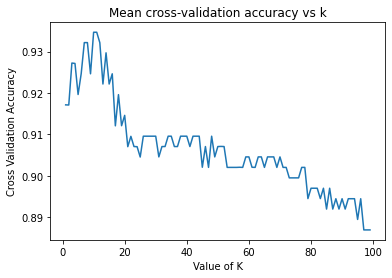

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
import numpy as np

k_all_scores = []
k_values = range(1, 100)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    k_all_scores.append(scores.mean())

print("k_all_scores-->",k_all_scores)
plt.plot(k_values, k_all_scores)
plt.xlabel('Value of K')
plt.ylabel('Cross Validation Accuracy')
max_accuracy = max(k_all_scores)
k_max_value_pos = k_all_scores.index(max_accuracy)
k_max = k_all_scores[k_max_value_pos] 
print("Ideal K value = ",k_max_value_pos)
print("Maximum Accuracy = ",k_max)
plt.title("Mean cross-validation accuracy vs k")
plt.show()



**Ideal K value =  9  
Maximum Accuracy =  0.9346518987341772**

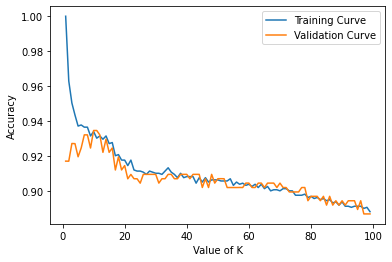

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt 
import numpy as np

training_acc = []
validation_acc = []
k_values = range(1, 100)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, x_train, y_train, cv=5, scoring='accuracy', return_train_score=True)
    training_acc.append(scores['train_score'].mean())
    validation_acc.append(scores['test_score'].mean())

plt.plot(k_values, training_acc,label = 'Training Curve')
plt.plot(k_values, validation_acc,label = 'Validation Curve')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



From the graph above, we can see that the model is overfitted for range of k = 1 to approximately k =5, where we can find there is a big difference between the training and validation set accuracy. 
Also we can see that the there is a gradual decrease in the accuracy after k = 60 , which can be termed as underfitting since the accuracy drops below 90 %.  
The best fit can be found in the ranges of k = 8 to k = 12 , where the error is minimal between the testing and validation set.


## Part 3: Feature Selection

In [ ]:
# function for knn classifier
def knn_function(x_train,y_train=y_train):
  k_all_scores = []
  k_values = range(1, 100)
  for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    k_all_scores.append(scores.mean())
  max_accuracy = max(k_all_scores)
  k_max_value_pos = k_all_scores.index(max_accuracy)
  k_max = k_all_scores[k_max_value_pos] 

  return k_max,k_max_value_pos

  

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
def Feature_selector (x_train , y_train , tr=0.95):
  features_removed = []
  accuracy_after_each_feature_removed = []
  k_after_each_feature_removed = []
  acc_of_original_dataset = 0.9346518987341772
  accuracy = 100.0
  features = np.array(dataset.feature_names)
  dt = DecisionTreeClassifier(random_state=0)
  dt.fit(x_train,y_train)
  no_of_features = len(x_train[0])
  importance = dt.feature_importances_
  i=0
  while(i<(no_of_features-1) and accuracy>(tr*acc_of_original_dataset)):
    column_to_be_removed = np.where(importance == np.amin(importance))
    importance = np.delete(importance,column_to_be_removed[0][0])
    # print("column_to_be_removed--->",column_to_be_removed[0][0])
    # print("Before--->",x_train.shape)
    x_train = np.delete(x_train,column_to_be_removed[0][0],axis=1)
    # print("After--->",x_train.shape)
    feature_to_be_removed = features[column_to_be_removed[0][0]]
    # print("feature_to_be_removed--->",feature_to_be_removed)
    # print("Before--->",len(features))
    # print(features)
    features = np.delete(features,column_to_be_removed[0][0])
    # print("After--->",len(features))
    # print(features)
    accuracy,k = knn_function(x_train)
    # print("K--->",k)
    # print("Accuracy-->",accuracy)
    # print("-------------------------------------------------------------------------------")
    features_removed.append(feature_to_be_removed)
    accuracy_after_each_feature_removed.append(accuracy)
    k_after_each_feature_removed.append(k)
    i=i+1

  return features_removed,accuracy_after_each_feature_removed,k_after_each_feature_removed

In [ ]:
result1,result2,result3 = Feature_selector(x_train,y_train)
result1 = np.array(result1)
result2 = np.array(result2)
result3 = np.array(result3)
# print(result1.shape,result2.shape,result3.shape)
result1 = np.reshape(result1,(29,1))
result2 = np.reshape(result2,(29,1))
result3 = np.reshape(result3,(29,1))
# print(result1.shape,result2.shape,result3.shape)

In [ ]:
np.concatenate((result1,result2,result3),axis=1)

array([['mean radius', '0.9346518987341772', '9'],
       ['mean texture', '0.9346518987341772', '9'],
       ['mean perimeter', '0.9321518987341773', '6'],
       ['mean area', '0.9145886075949367', '33'],
       ['mean smoothness', '0.9145886075949367', '33'],
       ['mean compactness', '0.9145886075949367', '33'],
       ['mean concave points', '0.9145886075949367', '33'],
       ['mean fractal dimension', '0.9145886075949367', '33'],
       ['radius error', '0.9145886075949367', '33'],
       ['texture error', '0.9145886075949367', '33'],
       ['perimeter error', '0.9145886075949367', '33'],
       ['compactness error', '0.9145886075949367', '33'],
       ['concavity error', '0.9145886075949367', '33'],
       ['concave points error', '0.9145886075949367', '33'],
       ['symmetry error', '0.9145886075949367', '33'],
       ['worst radius', '0.9145886075949367', '33'],
       ['worst perimeter', '0.9145569620253164', '60'],
       ['worst compactness', '0.9145569620253164', '60'

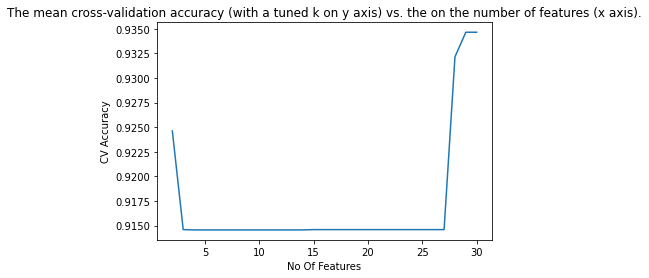

In [ ]:
no_of_features_value = np.arange(30,1,-1)
plt.plot(no_of_features_value, result2)
plt.xlabel('No Of Features')
plt.ylabel('CV Accuracy')
plt.title("The mean cross-validation accuracy (with a tuned k on y axis) vs. the on the number of features (x axis).")
plt.show()

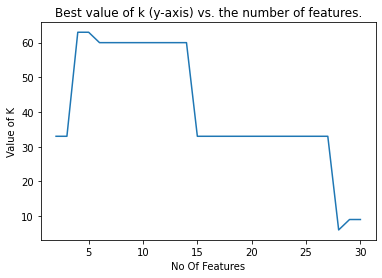

In [ ]:
no_of_features_value = np.arange(30,1,-1)
plt.plot(no_of_features_value, result3)
plt.xlabel('No Of Features')
plt.ylabel('Value of K')
plt.title('Best value of k (y-axis) vs. the number of features.')
plt.show()

29 can be considered as the best number of features since we can get maximum accuracy with it.  
But it can still be argued that there is not too much of a difference with accuracy when we use only one feature as well.  
But since we are focusing on getting the maximum accuracy, 29 is considered as best number of features for classification.

## Part 4: Standardization

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train = np.reshape(y_train,(398,1))
y_test = np.reshape(y_test,(171,1))
scaler.fit(y_train)
y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test)




In [ ]:
result1_scaled,result2_scaled,result3_scaled = Feature_selector(x_train_scaled,y_train)

In [ ]:
result1_scaled = np.reshape(result1_scaled,(29,1))
result2_scaled = np.reshape(result2_scaled,(29,1))
result3_scaled = np.reshape(result3_scaled,(29,1))

In [ ]:
np.concatenate((result1_scaled,result2_scaled,result3_scaled),axis=1)

array([['mean radius', '0.9649683544303798', '7'],
       ['mean texture', '0.9623417721518986', '3'],
       ['mean perimeter', '0.9598417721518986', '7'],
       ['mean area', '0.9598417721518988', '7'],
       ['mean smoothness', '0.9572468354430381', '4'],
       ['mean compactness', '0.9623417721518986', '6'],
       ['mean concave points', '0.9598101265822784', '7'],
       ['mean fractal dimension', '0.9598417721518986', '7'],
       ['radius error', '0.9573417721518988', '7'],
       ['texture error', '0.9598101265822784', '5'],
       ['perimeter error', '0.9599050632911392', '11'],
       ['compactness error', '0.9623101265822784', '3'],
       ['concavity error', '0.9598101265822784', '2'],
       ['concave points error', '0.9648417721518987', '3'],
       ['symmetry error', '0.9674050632911392', '5'],
       ['worst radius', '0.9623101265822784', '2'],
       ['worst perimeter', '0.9547151898734179', '2'],
       ['worst compactness', '0.952246835443038', '3'],
       ['wor

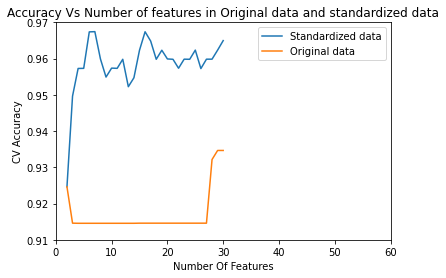

In [ ]:
no_of_features_value = np.arange(30,1,-1)
plt.xlim(0, 60)
plt.ylim(0.91, 0.97)
plt.plot(no_of_features_value, result2_scaled,label = "Standardized data")
plt.plot(no_of_features_value, result2,label = "Original data")
plt.xlabel('Number Of Features')
plt.ylabel('CV Accuracy')
plt.title('Accuracy Vs Number of features in Original data and standardized data')
plt.legend()
plt.show()

With standardizing the data, our model was able to given better results with significant improvement in the accuracy.  
 Max Accuracacy --> 0.9674367088607594  
 Number of features --> 4  
 K --> 3   
 Features were --> 'mean concavity', 'worst texture', 'worst symmetry', 'area error', 'worst area'.



## Part 5: Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
all_scores = []
depth_value = []
split_value = []
d_range = range(1,16)
split_range = range(2,16)
for depth in d_range:
  for split in split_range:
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=depth, min_samples_split=split,random_state= 0)
    scores = cross_val_score(dt, x_train_scaled, y_train, cv=5, scoring='accuracy')
    all_scores.append(scores.mean())
    depth_value.append(depth)
    split_value.append(split)



In [ ]:
print("Max Accuracy-->",all_scores[all_scores.index(max(all_scores))])
print("Max Depth-->",depth_value[all_scores.index(max(all_scores))])
print("Min Sample Split",split_value[all_scores.index(max(all_scores))])




Max Accuracy--> 0.9321518987341773
Max Depth--> 5
Min Sample Split 8


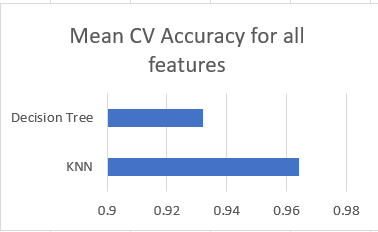  

From this it is clear that KNN performs better than Decision Tree.

## Part 6: Test Data [0.5 Mark]

In [ ]:
import sklearn.metrics as metrics

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train_scaled, y_train)
y_pred = knn.predict(x_test_scaled)
y_pred = np.reshape(y_pred,(171,1))
print(metrics.accuracy_score(y_test, y_pred))

0.9649122807017544


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for Test data is **0.9649122807017544**.  
So for the graphs and results above, we can see that KNN works best for the standardized data producing accuracy of over 96%.  
But without standardization i.e if we try to test the model on the non standardized test set, we're getting an accuracy of less than 40%.  Thus standardization is important part of preprocessing for the model to obtain a higher accuracy for unknown data.